<a href="https://colab.research.google.com/github/adhello007/ML-Projects/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 16s 0us/step


In [2]:
shuffle = np.random.permutation(50000)
x_train,y_train=x_train[shuffle],y_train[shuffle]

In [3]:
x_train = x_train/255.
x_test= x_test/255.

In [4]:

y_train,y_test = tf.keras.utils.to_categorical(y_train),tf.keras.utils.to_categorical(y_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten , Dense , Dropout 

model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()
          


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

In [6]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics  =['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

In [7]:
training = model.fit(x_train,y_train,batch_size=64,epochs=30,validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 19s 11ms/step - loss: 1.7923 - accuracy: 0.3297 - val_loss: 1.4392 - val_accuracy: 0.4613
Epoch 2/30
625/625 [==============================] - 7s 11ms/step - loss: 1.3723 - accuracy: 0.5092 - val_loss: 1.3124 - val_accuracy: 0.5334
Epoch 3/30
625/625 [==============================] - 6s 10ms/step - loss: 1.1849 - accuracy: 0.5801 - val_loss: 1.1344 - val_accuracy: 0.5926
Epoch 4/30
625/625 [==============================] - 7s 11ms/step - loss: 1.0712 - accuracy: 0.6229 - val_loss: 1.1219 - val_accuracy: 0.6048
Epoch 5/30
625/625 [==============================] - 6s 10ms/step - loss: 0.9926 - accuracy: 0.6521 - val_loss: 0.9031 - val_accuracy: 0.6788
Epoch 6/30
625/625 [==============================] - 8s 12ms/step - loss: 0.9201 - accuracy: 0.6792 - val_loss: 0.7967 - val_accuracy: 0.7179
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 0.8631 - accuracy: 0.7041 - val_loss: 0.9565 - val_accuracy: 0.659

In [8]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5546 - accuracy: 0.8200


In [9]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [10]:
y_pred.shape

(10000, 10)

In [11]:
y_pred = np.argmax(y_pred,axis=1)


In [12]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [13]:
y_test = np.argmax(y_test,axis=1)

Text(69.0, 0.5, 'Ground Truth')

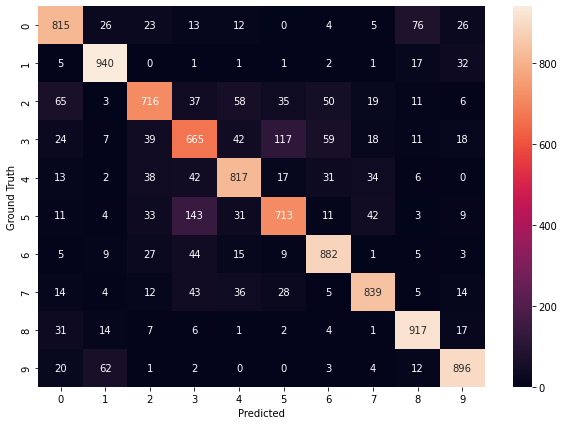

In [14]:
import tensorflow as tf 
import seaborn as sn 

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')


In [15]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

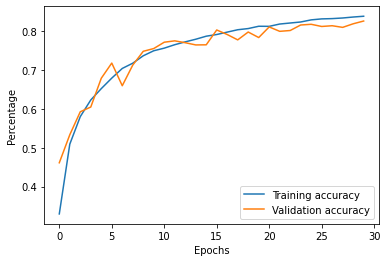

In [18]:
accuracy = training.history['accuracy']
val_acc= training.history['val_accuracy']
plt.plot(range(len(accuracy)),accuracy,label='Training accuracy')
plt.plot(range(len(accuracy)),val_acc,label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.show()

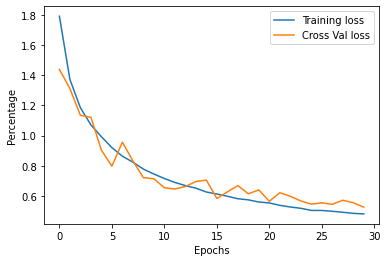

In [19]:
loss = training.history['loss']
val_loss = training.history['val_loss']
plt.plot(range(len(loss)),loss,label='Training loss')
plt.plot(range(len(loss)),val_loss,label='Cross Val loss')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.show()